# Plotting for Exploratory data analysis (EDA) using Heberman Data

What is EDA? understanding and analysis of the data. plotting of the data.

### Explanation as given below.

  Spotting mistakes and missing data;
  Mapping out the underlying structure of the data;
  Identifying the most important variables;
  Listing anomalies and outliers;
  Testing a hypotheses / checking assumptions related to a specific model;
  Establishing a parsimonious model (one that can be used to explain the data with minimal predictor variables);
  Estimating parameters and figuring out the associated confidence intervals or margins of error.

    Data-point/vector/Observation.
    Data-set.
    Feature/Variable/Input-variable/Dependent-varibale
    Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
    Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar

## Haberman's Survival Data Set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Data Source: https://www.kaggle.com/gilsousa/hebermans-survival-data-set/version/1

About this file Title: heberman's Survival Data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# Load the Heberman CSV file.
haberman = pd.read_csv("haberman.csv")

# (Q) how many data-points and features?
# Total 305 data points and 4 features are reported. 
haberman.columns = ['age', 'year', 'nodes', 'status']
print (haberman.shape)

#display top 5 rows
haberman.head(5)


(305, 4)


,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:

#(Q) What are the column names in our dataset?
# Print all columns names as there in CSV file. 
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
#get the status of haberman

haberman["status"].value_counts()

1    224
2     81
Name: status, dtype: int64

## 2-D Scatter Plot

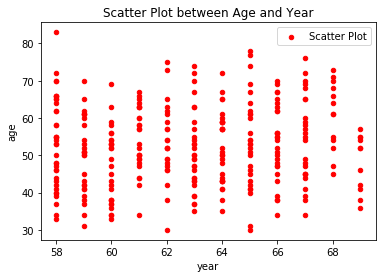

In [8]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.
# this is a scatter plot. x axis is column year and y axis is column age. 

haberman.plot(kind='scatter', x='year', y='age', color= 'red', label = 'Scatter Plot', title ='Scatter Plot between Age and Year') ;
# As you can see data is uneven, so plot is totally scattared. Color can be set by using color parmameter" ) ;
# As you can see data is uneven, so plot is totally scattared. Color can be set by using color parmameter. 

# matplotlib is used for plotting purpose.  even IK am using panda  plot to plot the graph, why do I need below command?? 


plt.show()
#Ans:Above command is used to plot the graph.

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

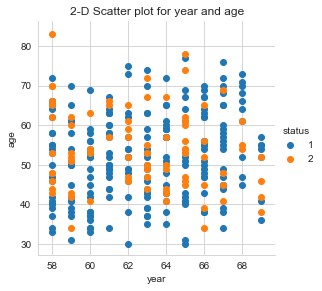

In [9]:
# 2-D Scatter plot with color-coding for each year
# Here 'sns' corresponds to seaborn. 

# seaborn is powerful enough to draw graphs in diffeenrtt color and style. 
# Hue = status, that means my graph will be colored based on "status" 

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4).map(plt.scatter, "year", "age").add_legend();
plt.title('2-D Scatter plot for year and age')
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# Ans: yes by using pair plots.
# Ans: Data is imbalance, data  can be balanced by normalizing it if to draw multiple features in one plot.
# this is example of linearly seperated plot.
# 3d plot is better way to visualize data.

# How many cobinations exist? 4C2 = 6.
# This is good to know when using pair plot, as pair  plot will draw in pair for all combinatiobns of features.

## Pair Plot 


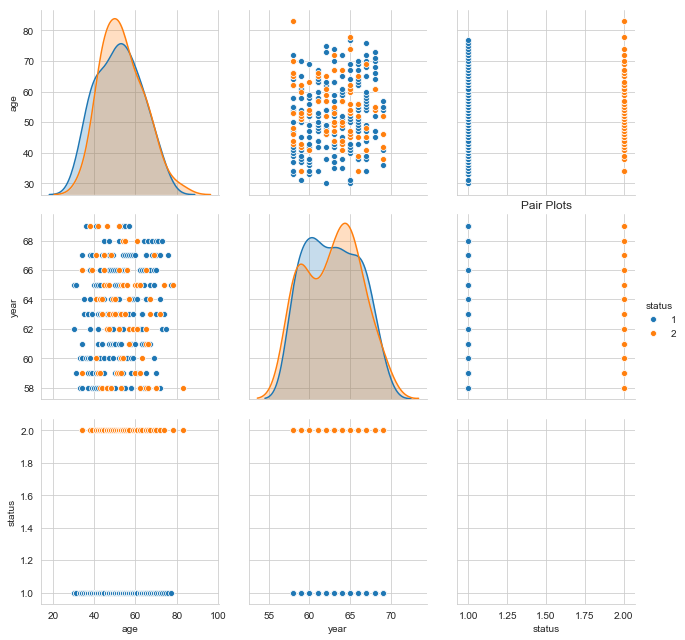

In [10]:
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.

# instead of reducing dimensations we dar pair plots. so if  there are 4 features, we draw 4C2 totals plots.  This technique is
# not good  if features are many. For smaller number is ok to use pair plot.

haberman1 = haberman.loc[:, ['age', 'year','status']]

haberman1.head(5)

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman1, hue="status", height=3);
plt.title('Pair Plots')
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

##  Histogram , PDF and CDF

Text(0.5,1,'Histogram for Age bins to show probability distribution')

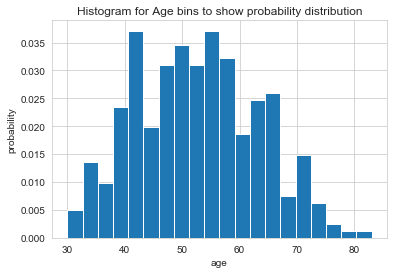

In [11]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
haberman_x = haberman['age']
plt.hist(haberman_x, normed=True, bins=20)
plt.xlabel('age');
plt.ylabel('probability');
plt.title('Histogram for Age bins to show probability distribution')

#Disadvantages of 1-D scatter plot: Very hard to make sense af data points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?
#Ans: Draw histograms for smaller segments as you can see in second diagram  and two more below diagrams, I can draw between points 4 to 5 on x-axis  
#to know PD/density between orange and green bar. PDF will show density of the data. PDF is smooth form of histogram. 
# PDF might be overlapping as well so I can get the data at % of probability say at 90% PD I have orange data points betwen 4 and 5.

Text(0.5,1,'Histogram for year bins to show probability distribution')

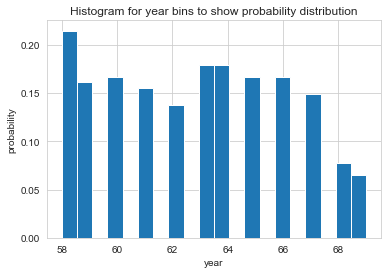

In [12]:
# histogram for feature year.
import numpy as np
haberman_x = haberman['year']
plt.hist(haberman_x, normed=True, bins=20)
plt.xlabel('year');
plt.ylabel('probability');
plt.title('Histogram for year bins to show probability distribution')

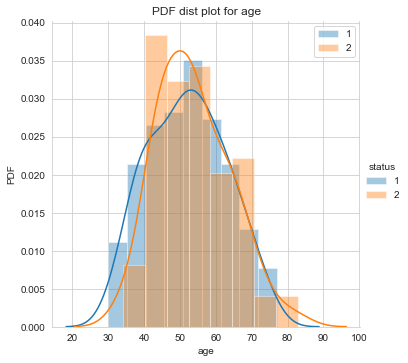

In [13]:
# facetgrid is used if to plot dependencies on multiple graphs,might not be good if only you have one grap to plot. 
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel('PDF')
plt.legend()
plt.title('PDF dist plot for age')
plt.show();

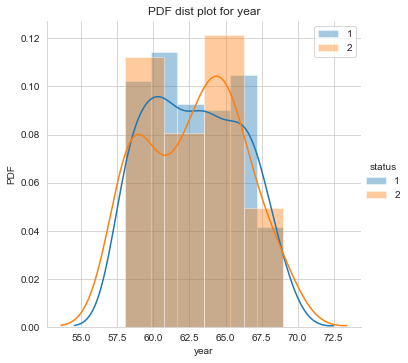

In [14]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.ylabel('PDF')
plt.legend()
plt.title('PDF dist plot for year')
plt.show();

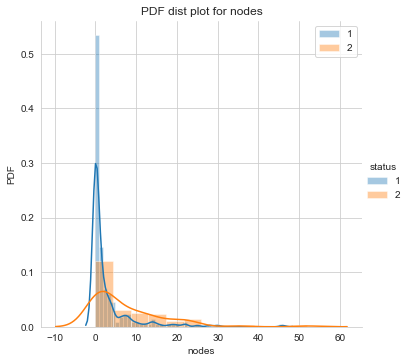

In [15]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel('PDF')
plt.legend()
plt.title('PDF dist plot for nodes')
plt.show();

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


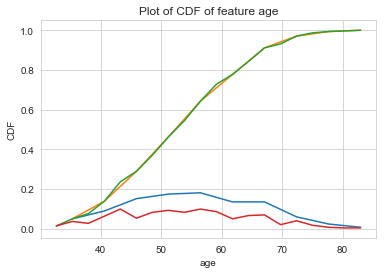

In [16]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
#Ans: How much the data points are condensed in a particular reagion  for a feature or set of features.
## Why is it called a probability plot?
#Ans: We would want to see how much % wise data pomits are captured in aregion for a particualr feature.
## for each value of petal_length, what does the value on y-axis mean?
#Ans: That shows how many data points are there on a particualr of X - axis. 
    
    # Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?
#Ans: Yes.  check if petal_lengh <5 calculate probability of the region where species = "versicolor" 
#as we can see form diagram  probability is 100%.

# Do some of these plots look like a bell-curve you studied in under-grad?
#Ans: They will look like bell curve as long as mean is 0  or near to zero and std dev =1 or near to 1   or we map mean to zero and std dev to 1 
#for all data points on x-axis. 
#CDF can also be calcuated to know total % probability of versicolor.

# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
#Ans: If calculated mean comes to 0, std dev to 1 for all data points on x-axis. 

# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

#  calculate CDF from PDF
cdf = np.cumsum(pdf)
# plot both PDF and CDF
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

# increase the bin coints so so bins are now double in same region.
counts, bin_edges = np.histogram(haberman['age'], bins=20, 
                                 density = True)
# Calculate PDF and CDF sice we increased the bin counts.
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf)
plt.plot(bin_edges[1:],pdf);
plt.title('Plot of CDF of feature age')
plt.xlabel ("age")
plt.ylabel ("CDF")
plt.show();

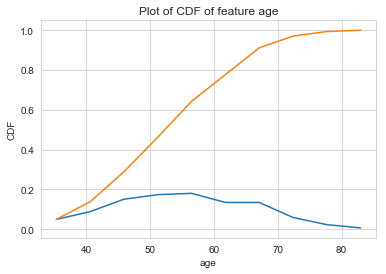

In [17]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of age have a 
# How to construct a CDF?
# How to read a CDF?
# as we can see from graph below age < 60, CDF is around 80% ( 0.80).
#Plot CDF of Age

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#compute CDF
plt.title('Plot of CDF of feature age')
plt.xlabel ("age")
plt.ylabel ("CDF")
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.73442623 0.         0.         0.         0.         0.
 0.         0.         0.         0.26557377]
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


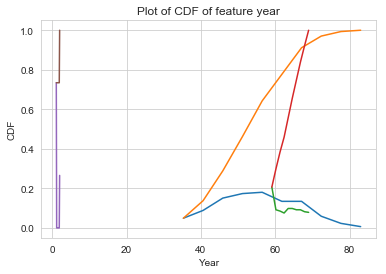

In [18]:
# Plot of CDF of feature year.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(haberman['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(haberman['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(haberman['status'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('Plot of CDF of feature year')
plt.xlabel ("Year")
plt.ylabel ("CDF")

plt.show();

## Mean, Variance and Std-dev

In [19]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman['age']))


print("\nStd-dev:");
print(np.std(haberman['age']))

Means:
52.5311475409836

Std-dev:
10.726396748570311


## Median, Percentile, Quantile, IQR, MAD

In [20]:

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman['age']))


print("\nQuantiles:")
print(np.percentile(haberman['age'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(haberman['age'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman['age']))


Medians:
52.0

Quantiles:
[30. 44. 52. 61.]

90th Percentiles:
67.0

Median Absolute Deviation
11.860817748044816


## Box plot and Whiskers

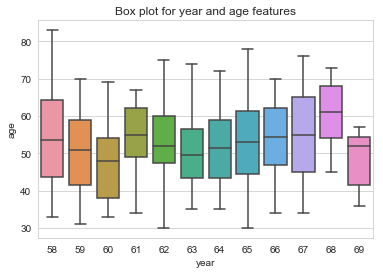

In [21]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='year',y='age', data=haberman)
plt.title('Box plot for year and age features')
plt.show()

## Violin plots

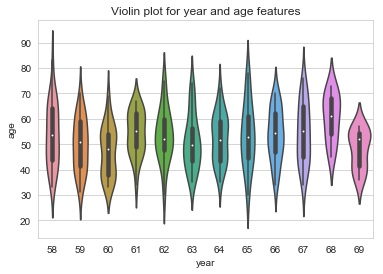

In [22]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="year", y="age", data=haberman, size=8)
plt.title('Violin plot for year and age features')
plt.show()

## Summarizing Plots


### Violin Plot:
Combination of historgram and box plot. If data is more condensed in middle portion of the graph, violin plot is better to use.

### Box Plot:
Can be drawn using sea born. These plots look like a box. Plot has line in the middle to show percentile value of x-axis and y-xasis for each plot.

### Scater Plot: 
As they name implies, this plot scatters the points on plane (data as a collection of points) . Points are plotted based on X-axis and Y-axis features are chosen. The position of a point depends on its two-dimensional value, where each value is a position on either the horizontal or vertical dimension

### Pair Plot:
They are better used when need to capture relationships between multiple featrures in pair of two. If there are 4 features, we woulkd have 4C2 plots in pair to draw to capture all relationsships in features anmd show in the form of plots. It is a bivariotae plot as each plottd between two features.

### Histogram:
Histogram is used to better understand bar chartchar is drawn base on feature taken on y-axis and on x-axis. x-axis could have bin length for wach bar. Histroghram is also used to derive PDF and CDF. Histogram is a univeriate plot.

### Box Plot:
Box plot is again bivariate plot. It has higher density presented in the box so mean of the data would be somehwre inside box plot. above and below box show the data very low volum

### Violin Plot: 
Very similar to box plot but better way to represent densed data instead showing just one box. It i a bivariate plot.

## Univariate, bivariate and multivariate analysis


Univariate analysis is used for single variable to plot. .Histogram is drawn on single feature "age", if I use two varaiables like "age" or "year" to build a model it is called bivariate analysis.For example, box plot, violin plot uare biviraite plots. Abvove plotted If more than two variables are used then that analysis is called multivariate analysis.

### PDF:(Probability Density Function) & CDF